# Problem Set 4

In [ ]:
import numpy as np
from sklearn.cluster import KMeans
import folium
from folium import plugins
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Make the graphs a bit prettier, and bigger
# pd.set_option('display.mpl_style', 'default')
plt.style.use('ggplot')

# This is necessary to show lots of columns in pandas 0.12. 
# Not necessary in pandas 0.13.
pd.set_option('display.width', 5000) 
pd.set_option('display.max_columns', 60)

plt.rcParams['figure.figsize'] = (15, 5)

In [ ]:
# This assigns the coffeeshops data to a dataframe object that maps to the "df" variable
df = pd.read_csv("data/coffeeshops.csv")
df = df.drop_duplicates()

In [ ]:
df.head()

,id,name,lat,lng,checkins,address
0,4b78d398f964a520cee32ee3,Starbucks Coffee,14.734710,121.057599,10428,"Ground Flr, SM City Fairview (Annex 1)"
1,53055beb498e87041e7204f9,Starbucks Coffee,14.735735,121.060213,3793,"Fairview Terraces, Quirino Hwy"
2,4bc1f1a6f8219c74a0f7b310,The Coffee Bean & Tea Leaf,14.736308,121.058135,17441,"G/F Gateway Mall, Gen Roxas Ave"
3,4e5b077352b1b78b81b213b9,Starbucks Coffee,14.734639,121.059474,4116,"2nd Flr, SM City Fairview (Main Bldg)"
4,4ceb3522e888f04d2161516b,Starbucks Coffee,14.553593,121.050662,40149,"Crossroads, Bonifacio Global City"


In [ ]:
df['name'].value_counts().head()

Starbucks Coffee              151
The Coffee Bean & Tea Leaf     31
Seattle's Best Coffee          15
Bo's Coffee                     7
UCC Vienna Café                 6
Name: name, dtype: int64

In [ ]:
len(df)

313

In [ ]:
df.describe()

,lat,lng,checkins
count,313.000000,313.000000,313.000000
mean,14.576405,121.036301,6261.146965
std,0.084305,0.039372,6268.944422
min,14.102268,120.860697,1.000000
25%,14.551362,121.019758,1159.000000
50%,14.575758,121.034795,4823.000000
75%,14.617451,121.056043,9390.000000
max,14.869520,121.251941,40149.000000


In [ ]:
print(df['lat'].var())
print(df['lng'].var())

0.007107412237131475
0.001550116431702583


In [ ]:
basemap = folium.Map(location=[14.5562297,121.0204097], tiles="cartodbdark_matter", zoom_start=15)

for index, row in df.iterrows():
    folium.CircleMarker([row["lat"], row["lng"]], radius=5,
    fill=True, popup = folium.Popup(row["name"], parse_html=True)).add_to(basemap)
    
basemap.save('coffeeshops.html')

basemap

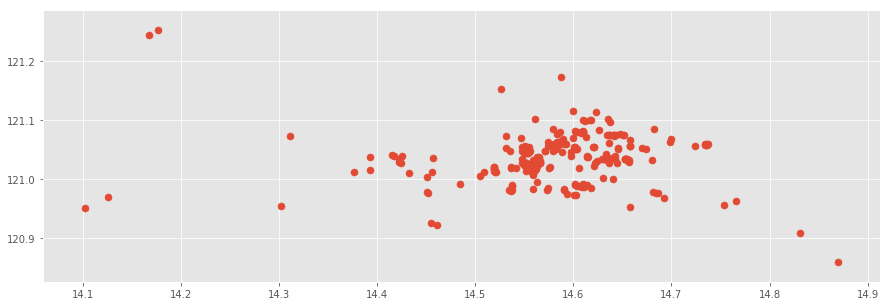

In [ ]:
X = np.array(df[["lat", "lng"]].values.tolist())
plt.scatter(X[:, 0], X[:, 1], s=50)

In [ ]:
kmeans = KMeans(n_clusters=10)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

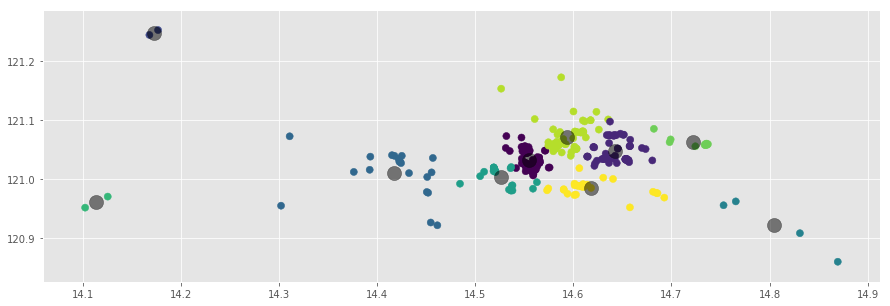

In [ ]:
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)

In [ ]:
df["cluster"] = y_kmeans

In [ ]:
df.head()

,id,name,lat,lng,checkins,address,cluster
0,4b78d398f964a520cee32ee3,Starbucks Coffee,14.734710,121.057599,10428,"Ground Flr, SM City Fairview (Annex 1)",7
1,53055beb498e87041e7204f9,Starbucks Coffee,14.735735,121.060213,3793,"Fairview Terraces, Quirino Hwy",7
2,4bc1f1a6f8219c74a0f7b310,The Coffee Bean & Tea Leaf,14.736308,121.058135,17441,"G/F Gateway Mall, Gen Roxas Ave",7
3,4e5b077352b1b78b81b213b9,Starbucks Coffee,14.734639,121.059474,4116,"2nd Flr, SM City Fairview (Main Bldg)",7
4,4ceb3522e888f04d2161516b,Starbucks Coffee,14.553593,121.050662,40149,"Crossroads, Bonifacio Global City",0


In [ ]:
palette = sns.color_palette("pastel", 10).as_hex()
palette

['#92c6ff',
 '#97f0aa',
 '#ff9f9a',
 '#d0bbff',
 '#fffea3',
 '#b0e0e6',
 '#92c6ff',
 '#97f0aa',
 '#ff9f9a',
 '#d0bbff']

In [ ]:
color_getter = lambda x: palette[int(x)]
df["color"] = df["cluster"].map(color_getter)
df.head()

,id,name,lat,lng,checkins,address,cluster,color
0,4b78d398f964a520cee32ee3,Starbucks Coffee,14.734710,121.057599,10428,"Ground Flr, SM City Fairview (Annex 1)",7,#97f0aa
1,53055beb498e87041e7204f9,Starbucks Coffee,14.735735,121.060213,3793,"Fairview Terraces, Quirino Hwy",7,#97f0aa
2,4bc1f1a6f8219c74a0f7b310,The Coffee Bean & Tea Leaf,14.736308,121.058135,17441,"G/F Gateway Mall, Gen Roxas Ave",7,#97f0aa
3,4e5b077352b1b78b81b213b9,Starbucks Coffee,14.734639,121.059474,4116,"2nd Flr, SM City Fairview (Main Bldg)",7,#97f0aa
4,4ceb3522e888f04d2161516b,Starbucks Coffee,14.553593,121.050662,40149,"Crossroads, Bonifacio Global City",0,#92c6ff


In [ ]:
basemap = folium.Map(location=[14.5562297,121.0204097], tiles="cartodbdark_matter", zoom_start=15)

for index, row in df.iterrows():
    folium.CircleMarker([row["lat"], row["lng"]], radius=5,
        fill=True,
        color =row["color"],
        popup = folium.Popup(row["name"], parse_html=True),
        fill_color=row["color"]).add_to(basemap)
    
basemap.save('coffeeshops.html')

basemap

In [ ]:
sum_of_squared_distances = []
K = range(1,30)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(X)
    sum_of_squared_distances.append(km.inertia_)

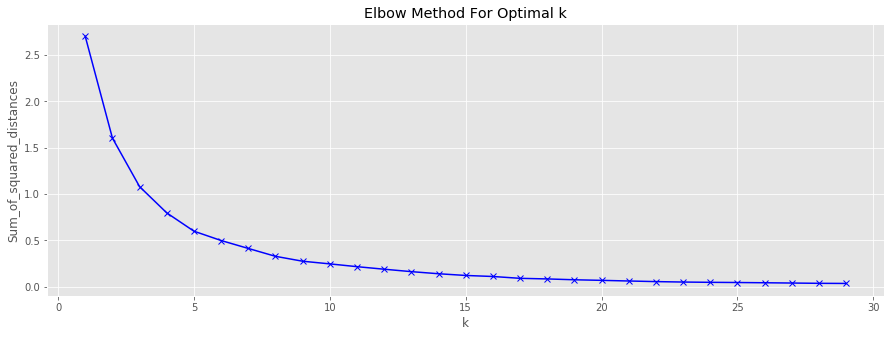

In [ ]:
plt.plot(K, sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [ ]:
df.to_csv("coffeeshops.csv")

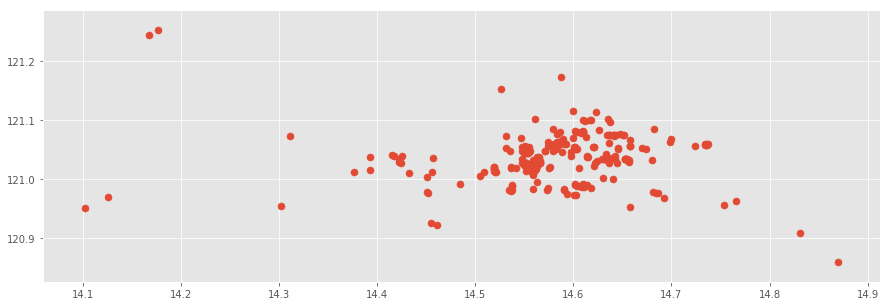

In [ ]:
X = np.array(df[["lat", "lng"]].values.tolist())
plt.scatter(X[:, 0], X[:, 1], s=50)

In [ ]:
dist = np.linalg.norm(X[1]-X[2])
dist

0.0021551174521337486

In [ ]:
len(X)

313

In [ ]:
dist1 = np.linalg.norm(X[2]-X[310])
dist1

0.12428240922917463

In [ ]:
dist2 = np.linalg.norm(X[3]-X[300])
dist2

0.3176470594966745

In [ ]:
dist3 = np.linalg.norm(X[4]-X[290])
dist3

0.1056383084200436

In [ ]:
dist4 = np.linalg.norm(X[5]-X[250])
dist4

0.18118479331771226

In [ ]:
dist5 = np.linalg.norm(X[6]-X[200])
dist5

0.007400378209640943

In [ ]:
dist6 = np.linalg.norm(X[7]-X[190])
dist6

0.13141727419500027

In [ ]:
dist7 = np.linalg.norm(X[8]-X[150])
dist7

0.05124641391380209

In [ ]:
dist8 = np.linalg.norm(X[9]-X[165])
dist8

0.012277849710423299

In [ ]:
dist9 = np.linalg.norm(X[10]-X[120])
dist9

0.15168332036182905

In [ ]:
dist10 = np.linalg.norm(X[11]-X[100])
dist10

0.08591081905689767

In [ ]:
eudist = (dist1+dist+dist2+dist3+dist4+dist5+dist6+dist7+dist8+dist9+dist10)/11
eudist

0.10644034030575746

In [ ]:
from sklearn.cluster import DBSCAN
dbscan = DBSCAN(eps=eudist, min_samples=5).fit(X)
y_dbscan = dbscan.labels_

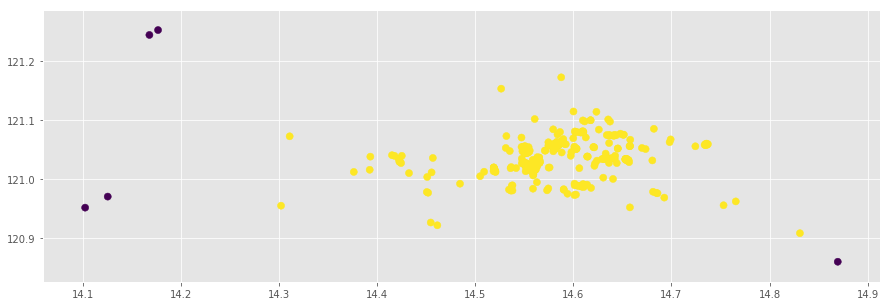

In [ ]:
plt.scatter(X[:, 0], X[:, 1], c=y_dbscan, s=50, cmap='viridis')

In [ ]:
df["dbscan_cluster"] = y_dbscan
palette = sns.color_palette("pastel", len(y_dbscan)).as_hex()
color_getter = lambda x: palette[int(x)]
df["db_color"] = df["dbscan_cluster"].map(color_getter)
df.head()

,id,name,lat,lng,checkins,address,cluster,color,dbscan_cluster,db_color
0,4b78d398f964a520cee32ee3,Starbucks Coffee,14.734710,121.057599,10428,"Ground Flr, SM City Fairview (Annex 1)",7,#97f0aa,0,#92c6ff
1,53055beb498e87041e7204f9,Starbucks Coffee,14.735735,121.060213,3793,"Fairview Terraces, Quirino Hwy",7,#97f0aa,0,#92c6ff
2,4bc1f1a6f8219c74a0f7b310,The Coffee Bean & Tea Leaf,14.736308,121.058135,17441,"G/F Gateway Mall, Gen Roxas Ave",7,#97f0aa,0,#92c6ff
3,4e5b077352b1b78b81b213b9,Starbucks Coffee,14.734639,121.059474,4116,"2nd Flr, SM City Fairview (Main Bldg)",7,#97f0aa,0,#92c6ff
4,4ceb3522e888f04d2161516b,Starbucks Coffee,14.553593,121.050662,40149,"Crossroads, Bonifacio Global City",0,#92c6ff,0,#92c6ff


In [ ]:
df = df[df["dbscan_cluster"] > -1]

In [ ]:
basemap = folium.Map(location=[14.5562297,121.0204097], tiles="cartodbdark_matter", zoom_start=15)

for index, row in df.iterrows():
    folium.CircleMarker([row["lat"], row["lng"]], radius=5,
    fill=True,color =row["db_color"],
    popup = folium.Popup(row["name"], parse_html=True),
    fill_color=row["db_color"]).add_to(basemap)
    
basemap.save('coffeeshops.html')

basemap